<a href="https://colab.research.google.com/github/bowie0713/DS-Project-1/blob/main/NBA_Three_Point_new_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [ ]:
#pip install requests beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "https://www.basketball-reference.com/leagues/NBA_2019.html#all_per_game_team-opponent"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202307191" rel="dns-prefetch"/>
  <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
  <script async="true" type="text/javascript">
   (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME =

In [ ]:
print(soup.title)

<title>2018-19 NBA Season Summary | Basketball-Reference.com</title>


In [ ]:
print(soup.title.text)

2018-19 NBA Season Summary | Basketball-Reference.com


In [ ]:
tags = soup.find_all('table')
print(tags)

[<table class="suppress_all sortable stats_table" data-cols-to-freeze=",1" id="confs_standings_E">
<caption>Conference Standings Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Eastern Conference" class="poptip sort_default_asc left" data-stat="team_name" scope="col">Eastern Conference</th>
<th aria-label="Wins" class="poptip right" data-stat="wins" data-tip="Wins" scope="col">W</th>
<th aria-label="Losses" class="poptip right" data-stat="losses" data-tip="Losses" scope="col">L</th>
<th aria-label="Win-Loss Percentage" class="poptip right" data-stat="win_loss_pct" data-tip="Win-Loss Percentage" scope="col">W/L%</th>
<th aria-label="GB" class="poptip sort_default_asc right" data-stat="gb" data-tip="Games Behind" scope="col">GB</th>
<th aria-label="Points Per Game" class="poptip right" data-stat="pts_per_g" data-tip="Points Per Game" scope="col">PS/G</th>
<th aria-label="Opponent Points Per Game" class="poptip right" data

In [ ]:
for a in tags:
  print(a.text)


Conference Standings Table



Eastern Conference
W
L
W/L%
GB
PS/G
PA/G
SRS


Milwaukee Bucks*6022.732—118.1109.38.04
Toronto Raptors*5824.7072.0114.4108.45.49
Philadelphia 76ers*5131.6229.0115.2112.52.25
Boston Celtics*4933.59811.0112.4108.03.90
Indiana Pacers*4834.58512.0108.0104.72.76
Brooklyn Nets*4240.51218.0112.2112.3-0.40
Orlando Magic*4240.51218.0107.3106.60.28
Detroit Pistons*4141.50019.0107.0107.3-0.56
Charlotte Hornets3943.47621.0110.7111.8-1.32
Miami Heat3943.47621.0105.7105.9-0.45
Washington Wizards3250.39028.0114.0116.9-3.30
Atlanta Hawks2953.35431.0113.3119.4-6.06
Chicago Bulls2260.26838.0104.9113.4-8.32
Cleveland Cavaliers1963.23241.0104.5114.1-9.39
New York Knicks1765.20743.0104.6113.8-8.93


  Table



Western Conference
W
L
W/L%
GB
PS/G
PA/G
SRS


Golden State Warriors*5725.695—117.7111.26.42
Denver Nuggets*5428.6593.0110.7106.74.19
Portland Trail Blazers*5329.6464.0114.7110.54.43
Houston Rockets*5329.6464.0113.9109.14.96
Utah Jazz*5032.6107.0111.7106.55.28
Oklahoma 

In [ ]:
from IPython.lib.display import TextDisplayObject
nba2019_table = soup.find("table", attrs={"class": "stats_table sortable"})
nba2019_table_data = nba2019_table.tbody.find_all("tr")

nba2019_table_data


[<tr><th class="right" data-stat="ranker" scope="row">1</th><td class="left" data-stat="team"><a href="/teams/MIL/2019.html">Milwaukee Bucks</a>*</td><td class="right" data-stat="g">82</td><td class="right" data-stat="mp">241.2</td><td class="right" data-stat="fg">43.4</td><td class="right" data-stat="fga">91.1</td><td class="right" data-stat="fg_pct">.476</td><td class="right" data-stat="fg3">13.5</td><td class="right" data-stat="fg3a">38.2</td><td class="right" data-stat="fg3_pct">.353</td><td class="right" data-stat="fg2">29.9</td><td class="right" data-stat="fg2a">52.9</td><td class="right" data-stat="fg2_pct">.565</td><td class="right" data-stat="ft">17.9</td><td class="right" data-stat="fta">23.2</td><td class="right" data-stat="ft_pct">.773</td><td class="right" data-stat="orb">9.3</td><td class="right" data-stat="drb">40.4</td><td class="right" data-stat="trb">49.7</td><td class="right" data-stat="ast">26.0</td><td class="right" data-stat="stl">7.5</td><td class="right" data-st

In [2]:
df = pd.read_excel("/content/nba_dataframe.xls")
df.head()

Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
0       Sacramento Kings*  82  241.8  43.6  88.2  0.494  13.8  37.3  0.369   
1  Golden State Warriors*  82  241.8  43.1  90.2  0.479  16.6  43.2  0.385   
2          Atlanta Hawks*  82  242.1  44.6  92.4  0.483  10.8  30.5  0.352   
3         Boston Celtics*  82  243.7  42.2  88.8  0.475  16.0  42.6  0.377   
4   Oklahoma City Thunder  82  242.1  43.1  92.6  0.465  12.1  34.1  0.356   

     2P  ...   DRB   TRB   AST  STL  BLK   TOV    PF    PTS       Year  \
0  29.8  ...  32.9  42.5  27.3  7.0  3.4  13.5  19.7  120.7  2022-2023   
1  26.5  ...  34.1  44.6  29.8  7.2  3.9  16.3  21.4  118.9  2022-2023   
2  33.9  ...  33.2  44.4  25.0  7.1  4.9  12.9  18.8  118.4  2022-2023   
3  26.2  ...  35.6  45.3  26.7  6.4  5.2  13.4  18.8  117.9  2022-2023   
4  31.0  ...  32.3  43.6  24.4  8.2  4.2  13.0  21.0  117.5  2022-2023   

   Playoff  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 26 columns]

In [3]:
newlist = list(df['Year'])
yearset = set()
for i in newlist:
  yearset.add(i)
yearset
yeardict = {'1979-1980': 1980,
 '1980-1981': 1981,
 '1981-1982': 1982,
 '1982-1983': 1983,
 '1983-1984': 1984,
 '1984-1985': 1985,
 '1985-1986': 1986,
 '1986-1987': 1987,
 '1987-1988': 1988,
 '1988-1989': 1989,
 '1989-1990': 1990,
 '1990-1991': 1991,
 '1991-1992': 1992,
 '1992-1993': 1993,
 '1993-1994': 1994,
 '1994-1995': 1995,
 '1995-1996': 1996,
 '1996-1997': 1997,
 '1997-1998': 1998,
 '1998-1999': 1999,
 '1999-2000': 2000,
 '2000-2001': 2001,
 '2001-2002': 2002,
 '2002-2003': 2003,
 '2003-2004': 2004,
 '2004-2005': 2005,
 '2005-2006': 2006,
 '2006-2007': 2007,
 '2007-2008': 2008,
 '2008-2009': 2009,
 '2009-2010': 2010,
 '2010-2011': 2011,
 '2011-2012': 2012,
 '2012-2013': 2013,
 '2013-2014': 2014,
 '2014-2015': 2015,
 '2015-2016': 2016,
 '2016-2017': 2017,
 '2017-2018': 2018,
 '2018-2019': 2019,
 '2019-2020': 2020,
 '2020-2021': 2021,
 '2021-2022': 2022,
 '2022-2023': 2023}
df['Year'] = df['Year'].replace(yeardict, regex = True)
df

Team   G     MP    FG   FGA    FG%    3P   3PA  \
0           Sacramento Kings*  82  241.8  43.6  88.2  0.494  13.8  37.3   
1      Golden State Warriors*  82  241.8  43.1  90.2  0.479  16.6  43.2   
2              Atlanta Hawks*  82  242.1  44.6  92.4  0.483  10.8  30.5   
3             Boston Celtics*  82  243.7  42.2  88.8  0.475  16.0  42.6   
4       Oklahoma City Thunder  82  242.1  43.1  92.6  0.465  12.1  34.1   
...                       ...  ..    ...   ...   ...    ...   ...   ...   
1263           Atlanta Hawks*  82  241.2  39.8  85.7  0.464   0.2   0.9   
1264    Golden State Warriors  82  242.4  43.0  89.2  0.482   0.3   1.5   
1265  Portland Trail Blazers*  82  241.2  41.6  87.4  0.476   0.3   1.6   
1266                Utah Jazz  82  241.5  41.2  83.1  0.496   0.7   2.3   
1267           League Average  82  241.8  43.6  90.6  0.481   0.8   2.8   

        3P%    2P  ...   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  Year  \
0     0.369  29.8  ...  32.9  42.5  27.3  7.0  3.4  13.5  19.7  120.7  2023   
1     0.385  26.5  ...  34.1  44.6  29.8  7.2  3.9  16.3  21.4  118.9  2023   
2     0.352  33.9  ...  33.2  44.4  25.0  7.1  4.9  12.9  18.8  118.4  2023   
3     0.377  26.2  ...  35.6  45.3  26.7  6.4  5.2  13.4  18.8  117.9  2023   
4     0.356  31.0  ...  32.3  43.6  24.4  8.2  4.2  13.0  21.0  117.5  2023   
...     ...   ...  ...   ...   ...   ...  ...  ...   ...   ...    ...   ...   
1263  0.173  39.6  ...  29.3  46.0  23.3  9.5  6.6  18.2  28.0  104.5  1980   
1264  0.223  42.7  ...  29.7  43.8  24.7  9.5  4.1  18.2  25.4  103.6  1980   
1265  0.197  41.2  ...  29.4  45.2  23.1  8.6  5.8  18.9  23.9  102.5  1980   
1266  0.319  40.5  ...  28.8  40.6  24.5  8.0  4.4  18.8  24.5  102.4  1980   
1267  0.280  42.9  ...  29.9  44.9  25.8  9.4  5.3  18.9  24.4  109.3  1980   

      Playoff  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
1263      NaN  
1264      NaN  
1265      NaN  
1266      NaN  
1267      NaN  

[1268 rows x 26 columns]

In [4]:
result = df['Team'].str.contains(r'\*') # an asterick is a special character that means "zero" or "more of the preceding element"
# r means raw string
print(result)

0        True
1        True
2        True
3        True
4       False
        ...  
1263     True
1264    False
1265     True
1266    False
1267    False
Name: Team, Length: 1268, dtype: bool


In [5]:
df['Playoff'] = "No"
df.loc[df['Team'].str.contains(r'\*'), 'Playoff'] = "Yes"

In [6]:
df['Team'] = df['Team'].str.replace('*','', regex = True) # delete all * sign
df['Team']

0             Sacramento Kings
1        Golden State Warriors
2                Atlanta Hawks
3               Boston Celtics
4        Oklahoma City Thunder
                 ...          
1263             Atlanta Hawks
1264     Golden State Warriors
1265    Portland Trail Blazers
1266                 Utah Jazz
1267            League Average
Name: Team, Length: 1268, dtype: object

# Questions I want to Answer


1. which team in which year shoot the most three
2. which year in average shoot the most three
3. which top three team shoot the most three since 2010, 2000s, 1990s, and 1980s
4. Correlation between pts vs 3pa
5. Correlation between pts vs 3pt
6. Compare team with number of three point shots
7. Predictive Model on three point shots attempt
8. Which franchise shoot most three points
9. Maybe? Three point attempt/make vs playoff
10. 3PA vs 2PA, 3P vs 2P



In [7]:
fig, ax = plt.subplots(figsize = (14, 14))
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), ax = ax)


<ipython-input-7-b9d0d6187fe0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<Axes: >

# Which Team in which year Shoot Most Three

In [8]:
df[['Team', 'Year', '3PA']].sort_values(by = ['3PA'], ascending = False).reset_index(drop=True).head(10)

Team  Year   3PA
0         Houston Rockets  2019  45.4
1         Houston Rockets  2020  45.3
2   Golden State Warriors  2023  43.2
3               Utah Jazz  2021  43.0
4          Boston Celtics  2023  42.6
5         Houston Rockets  2018  42.3
6  Minnesota Timberwolves  2022  41.3
7        Dallas Mavericks  2020  41.3
8        Dallas Mavericks  2023  41.0
9  Portland Trail Blazers  2021  40.8

In [9]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.set_style('darkgrid')
plt.scatter( df['Year'], df['3PA'])
plt.xlabel('Season')
plt.ylabel('3PA')
plt.title('NBA Three Point Attempt Since 1980')
plt.legend()
plt.show()

[Text(0.5, 1.0, "Each Team's Three Point Attempt Over the Year")]

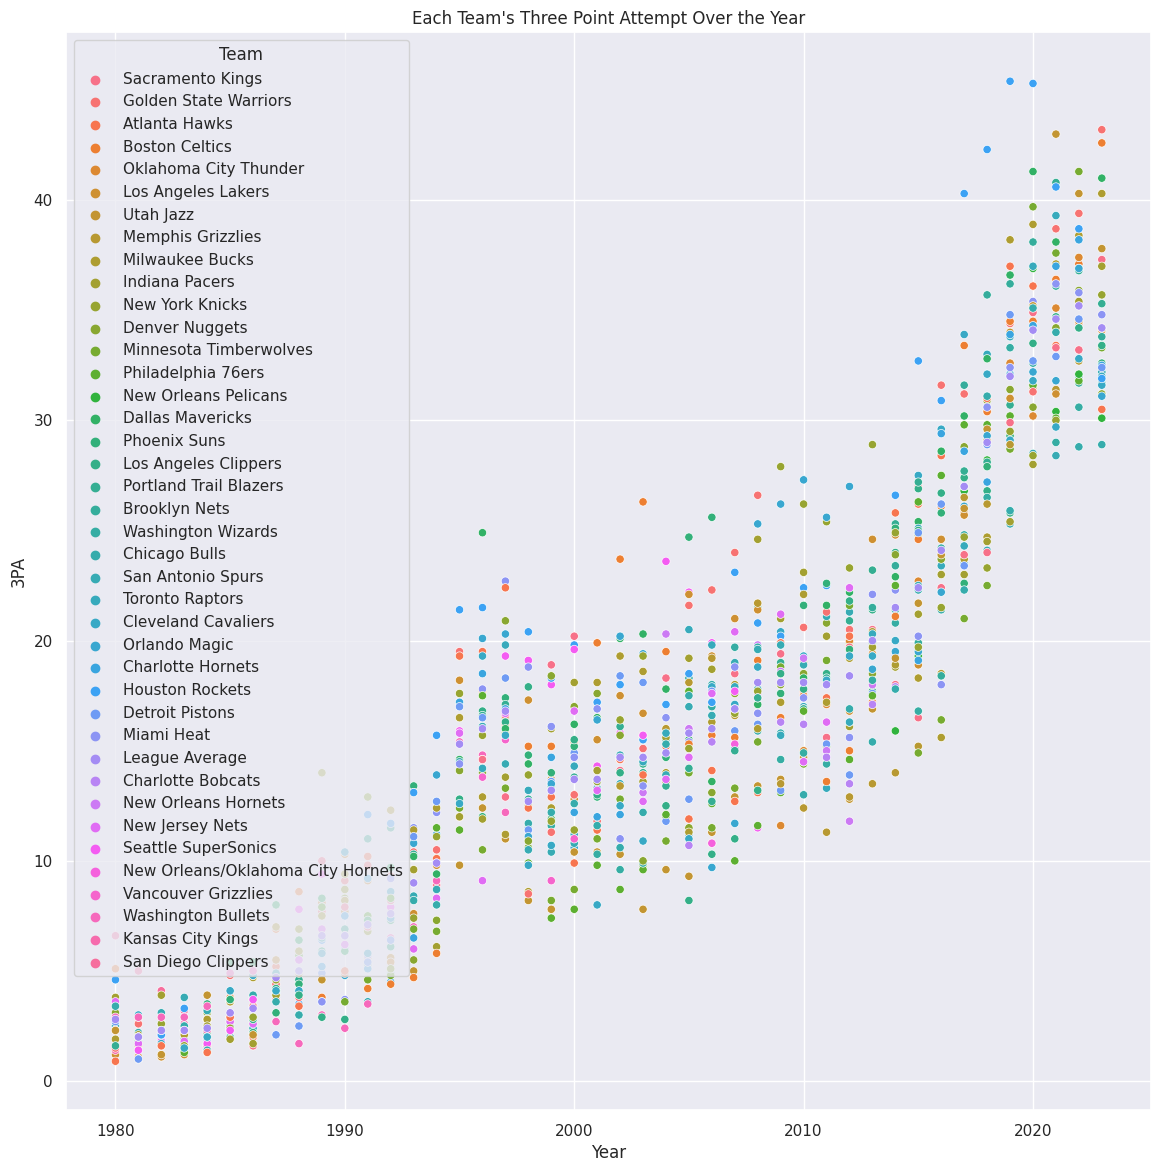

In [10]:
sns.set(rc={'figure.figsize':(14, 14)})
sns.scatterplot(data = df, x = 'Year', y = '3PA', hue = 'Team').set(title = "Each Team's Three Point Attempt Over the Year")

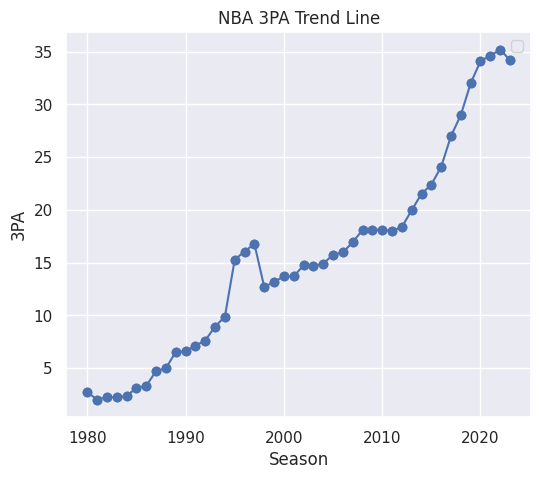

In [11]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (6, 5))
x1 = df.groupby("Year")['3PA'].mean()
plt.scatter(x = sorted(df['Year'].unique()), y = x1)
plt.plot(sorted(df['Year'].unique()), x1, '-o')
plt.xlabel('Season')
plt.ylabel('3PA')
plt.legend()
plt.title("NBA 3PA Trend Line")
plt.show()

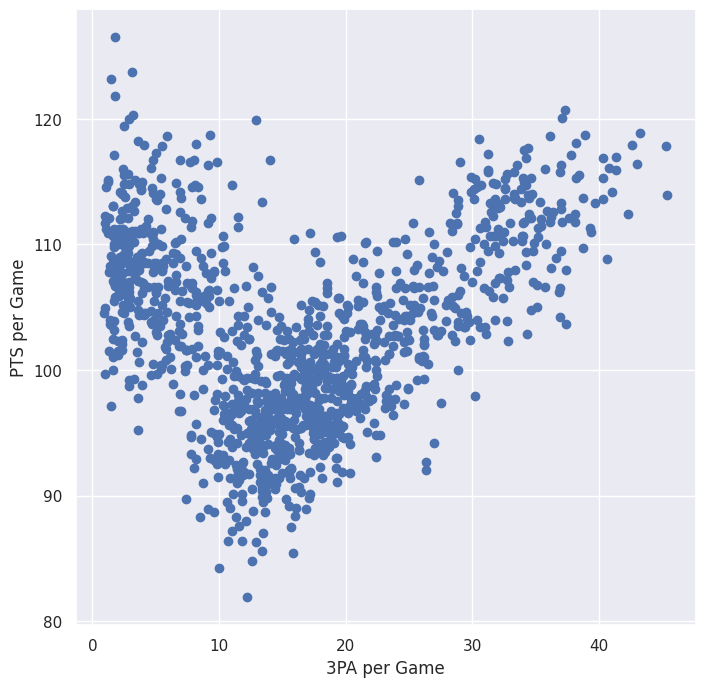

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(df['3PA'], df['PTS'])
ax.set_xlabel('3PA per Game')
ax.set_ylabel('PTS per Game')
plt.show()

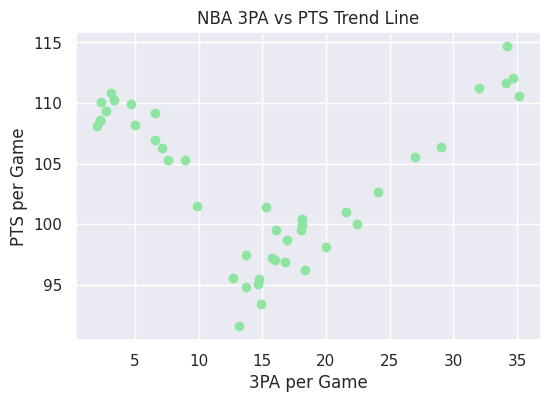

In [13]:
fig, ax1 = plt.subplots(figsize = (6, 4))
ax1.scatter(df.groupby(["Year"])['3PA'].mean(), df.groupby(["Year"])['PTS'].mean(), color = sns.color_palette('pastel')[2])
ax1.set_xlabel('3PA per Game')
ax1.set_ylabel('PTS per Game')
ax1.set_title("NBA 3PA vs PTS Trend Line")
plt.show()

## Which franchise have the most three point attempt on average?

In [14]:
df.groupby(['Team'])['3PA'].mean().sort_values(ascending = False).head(10)

Team
Brooklyn Nets            29.672727
New Orleans Pelicans     27.340000
Oklahoma City Thunder    25.166667
Toronto Raptors          21.314286
Memphis Grizzlies        20.150000
Orlando Magic            19.808824
Houston Rockets          19.363636
Washington Wizards       19.334615
Miami Heat               18.925714
Charlotte Hornets        18.904348
Name: 3PA, dtype: float64

## Which franchise made themost three point on average?

In [15]:
df.groupby(['Team'])['3P'].mean().sort_values(ascending = False).head(10)

Team
Brooklyn Nets            10.654545
New Orleans Pelicans      9.730000
Oklahoma City Thunder     8.726667
Toronto Raptors           7.664286
Memphis Grizzlies         7.036364
Orlando Magic             7.011765
Washington Wizards        6.807692
Miami Heat                6.762857
Houston Rockets           6.759091
Charlotte Hornets         6.756522
Name: 3P, dtype: float64

# Divide in Different Year

In [16]:
df_1990 = df.query("Year <= 1990")
df_2000 = df.query("Year > 1990 & Year <= 2000")
df_2010 = df.query("Year > 2000 & Year <= 2010")
df_2020 = df.query("Year > 2010")

In [17]:
df_1990[['Team', '3PA', 'Year']].sort_values(by = ["3PA"], ascending = False).reset_index(drop= True).head()

Team   3PA  Year
0      New York Knicks  14.0  1989
1  Cleveland Cavaliers  10.4  1990
2   Los Angeles Lakers  10.3  1990
3     Sacramento Kings  10.0  1989
4  Seattle SuperSonics   9.4  1989

In [18]:
x_1990 = df_1990.groupby("Team")['3PA'].mean()
x_1990.sort_values(ascending = False).head(3)

Team
Charlotte Hornets    6.35
Sacramento Kings     5.74
Dallas Mavericks     4.82
Name: 3PA, dtype: float64

In [19]:
df_2000[['Team', '3PA', 'Year']].sort_values(by = ["3PA"], ascending = False).reset_index(drop= True).head()

Team   3PA  Year
0  Dallas Mavericks  24.9  1996
1        Miami Heat  22.7  1997
2   Houston Rockets  22.4  1997
3     Atlanta Hawks  22.4  1997
4   Houston Rockets  21.5  1996

In [20]:
x_2000 = df_2000.groupby("Team")['3PA'].mean()
x_2000.sort_values(ascending = False).head(3)

Team
Houston Rockets    17.64
Toronto Raptors    14.94
Miami Heat         14.31
Name: 3PA, dtype: float64

In [21]:
df_2010[['Team', '3PA', 'Year']].sort_values(by = ["3PA"], ascending = False).reset_index(drop= True).head()

Team   3PA  Year
0        New York Knicks  27.9  2009
1          Orlando Magic  27.3  2010
2  Golden State Warriors  26.6  2008
3         Boston Celtics  26.3  2003
4        New York Knicks  26.2  2010

In [22]:
x_2010 = df_2010.groupby("Team")['3PA'].mean()
x_2010.sort_values(ascending = False).head(3)

Team
Phoenix Suns       19.00
Houston Rockets    19.00
Boston Celtics     18.91
Name: 3PA, dtype: float64

In [23]:
df_2020[['Team', '3PA', 'Year']].sort_values(by = ["3PA"], ascending = False).reset_index(drop= True).head()

Team   3PA  Year
0        Houston Rockets  45.4  2019
1        Houston Rockets  45.3  2020
2  Golden State Warriors  43.2  2023
3              Utah Jazz  43.0  2021
4         Boston Celtics  42.6  2023

In [24]:
x_2020 = df_2020.groupby("Team")['3PA'].mean()
x_2020.sort_values(ascending = False).head(3)

Team
Houston Rockets      34.330769
Charlotte Hornets    31.133333
Dallas Mavericks     30.615385
Name: 3PA, dtype: float64

# 3PA vs 2PA

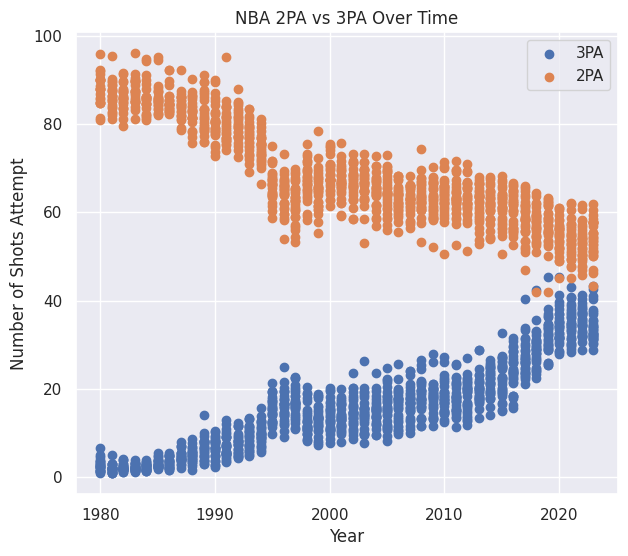

In [25]:
fig1, ax2 = plt.subplots(figsize = (7, 6))
ax2.scatter(df['Year'], df['3PA'], label = '3PA')
ax2.scatter(df['Year'], df['2PA'], label = '2PA')
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Shots Attempt")
ax2.set_title("NBA 2PA vs 3PA Over Time")
plt.legend()
plt.show()

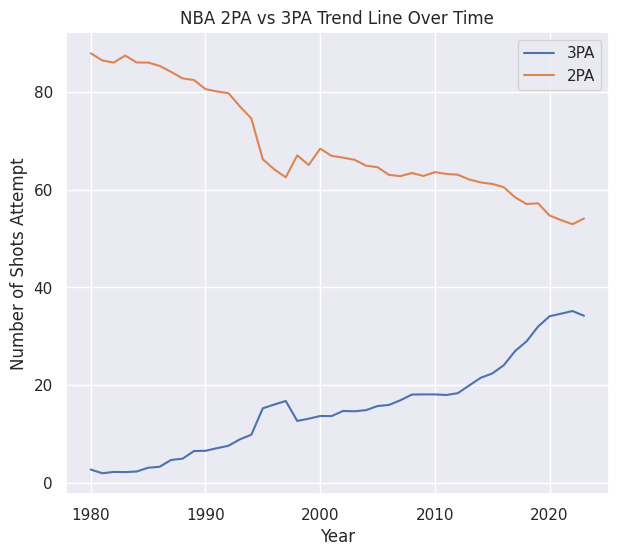

In [26]:
fig1, ax2 = plt.subplots(figsize = (7, 6))
ax2.plot(sorted(df['Year'].unique()), df.groupby("Year")["3PA"].mean(), label = '3PA')
ax2.plot(sorted(df['Year'].unique()), df.groupby("Year")["2PA"].mean(), label = '2PA')
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Shots Attempt")
ax2.set_title("NBA 2PA vs 3PA Trend Line Over Time")
plt.legend()
plt.show()

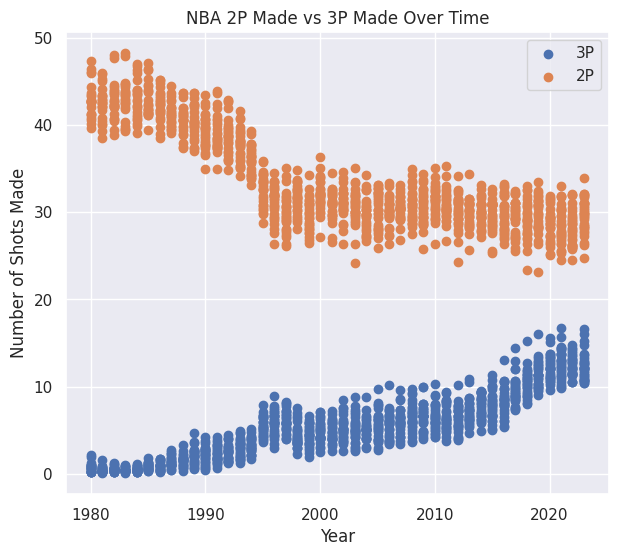

In [27]:
fig1, ax2 = plt.subplots(figsize = (7, 6))
ax2.scatter(df['Year'], df['3P'], label = '3P')
ax2.scatter(df['Year'], df['2P'], label = '2P')
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Shots Made")
ax2.set_title("NBA 2P Made vs 3P Made Over Time")
plt.legend()
plt.show()

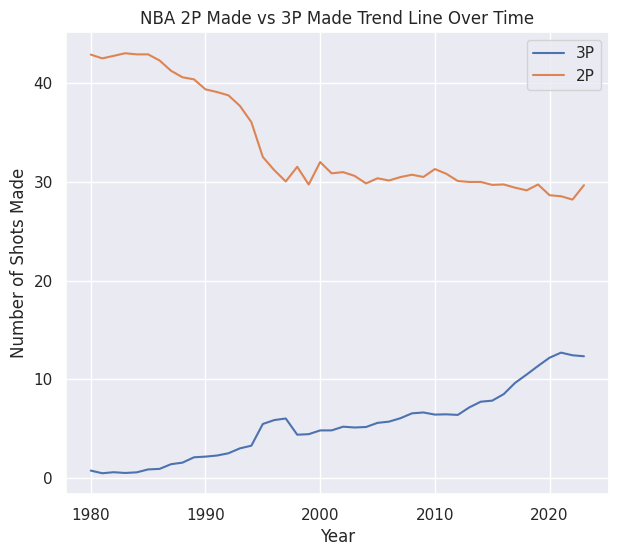

In [28]:
fig1, ax2 = plt.subplots(figsize = (7, 6))
ax2.plot(sorted(df['Year'].unique()), df.groupby("Year")["3P"].mean(), label = '3P')
ax2.plot(sorted(df['Year'].unique()), df.groupby("Year")["2P"].mean(), label = '2P')
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Shots Made")
ax2.set_title("NBA 2P Made vs 3P Made Trend Line Over Time")
plt.legend()
plt.show()

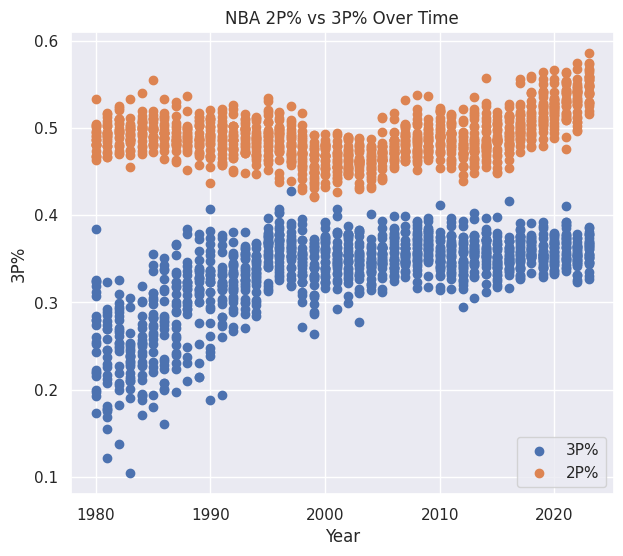

In [29]:
fig1, ax2 = plt.subplots(figsize = (7, 6))
ax2.scatter(df['Year'], df['3P%'], label = '3P%')
ax2.scatter(df['Year'], df['2P%'], label = '2P%')
ax2.set_xlabel("Year")
ax2.set_ylabel("3P%")
ax2.set_title("NBA 2P% vs 3P% Over Time")
plt.legend()
plt.show()

In [30]:
fig1, ax2 = plt.subplots(figsize = (7, 6))
ax2.plot(sorted(df['Year'].unique()), df.groupby("Year")["3P%"].mean(), label = '3P%')
ax2.plot(sorted(df['Year'].unique()), df.groupby("Year")["2P%"].mean(), label = '2P%')
ax2.set_xlabel("Year")
ax2.set_ylabel("Percentage")
ax2.set_title("NBA 2P% vs 3P% Trend Line Over Time")
plt.legend()
plt.show()

# 3PA vs Making Playoff

In [31]:
df_playoff = df.query("Playoff == 'Yes'")
df_noplayoff = df.query("Playoff == 'No'")
fig, ax3 = plt.subplots(figsize = (7, 6))
ax3.scatter(df_playoff['Year'], df_playoff['3PA'], label = 'Make Playoff')
ax3.scatter(df_noplayoff['Year'], df_noplayoff['3PA'], label = 'No Playoff')
plt.legend()
plt.show()

# Statistics Model

Predict PTS Based on 3PA and other metrics

Predict Playoff Status


In [32]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [33]:
new = df.drop(['Team', 'Playoff'], axis = 1)
df_new = StandardScaler().fit_transform(new)
print(df_new)

[[ 0.28875217  0.13185484  1.42103505 ... -1.02323931  2.40121786
   1.64318023]
 [ 0.28875217  0.13185484  1.26669115 ... -0.29586342  2.15770975
   1.64318023]
 [ 0.28875217  0.49584311  1.72972286 ... -1.40832066  2.0900686
   1.64318023]
 ...
 [ 0.28875217 -0.59612168  0.80365945 ...  0.77380701 -0.0609197
  -1.81599964]
 [ 0.28875217 -0.23213342  0.68018433 ...  1.03052791 -0.07444793
  -1.81599964]
 [ 0.28875217  0.13185484  1.42103505 ...  0.9877411   0.85899982
  -1.81599964]]


In [34]:
Y = df['PTS'] # Predicting Value
X = df.iloc[:,2:-3] # All Features excluding Team Name, # of Games Play, and Playoff Status


In [35]:
best_feature = SelectKBest(score_func=f_classif)
fit = best_feature.fit(X, Y)
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by='Score')

Features      Score
18      BLK   1.026898
0        MP   1.193189
17      STL   1.254500
13      ORB   1.301173
20       PF   1.304922
19      TOV   1.329363
6       3P%   1.448160
5       3PA   1.507471
4        3P   1.538495
12      FT%   1.542268
8       2PA   1.661888
11      FTA   1.665523
14      DRB   1.886632
10       FT   1.991173
7        2P   2.589968
15      TRB   2.652921
16      AST   5.437943
3       FG%   5.523095
9       2P%   7.897401
2       FGA   8.483429
1        FG  22.253658

## Since we are looing at 3PA in this project, we'll start with 3PA and 3P to predict PTS.

In [36]:
train, test = np.split(df.sample(frac = 1), [int(0.75*len(df))]) # split 75, 25

In [37]:
print(train.shape)
print(test.shape)

(951, 26)
(317, 26)


In [38]:
lin_reg = LinearRegression()
lin_reg.fit(train[['3PA', '3P']], train['PTS'])
prediction = lin_reg.predict(test[['3PA', '3P']])
prediction

array([102.83099427, 103.12224413, 103.25553394, 102.8307386 ,
       104.39765278, 102.64072635, 101.08119414, 101.4044962 ,
       103.18583721, 101.55635261, 102.54584805, 101.1763281 ,
       103.1288591 , 103.05357005, 101.48665588, 101.77841707,
       102.75519389, 101.9699633 , 102.03838171, 105.36145532,
       101.75297984, 101.58178984, 101.79723933, 101.95571071,
       103.95301253, 102.58374824, 103.08485527, 101.35413306,
       101.47419293, 101.28392501, 103.56052507, 102.41255824,
       102.36142812, 101.70872034, 103.11614048, 103.09095891,
       102.0256631 , 102.24798322, 101.53906432, 102.12715637,
       104.14989542, 102.14038631, 104.18194762, 102.97013206,
       101.56271192, 102.99608062, 102.37465806, 103.21763375,
       101.31572155, 101.8544731 , 103.68796689, 102.0256631 ,
       101.61969003, 102.46471102, 101.7718021 , 101.52506739,
       103.38856808, 102.20397939, 103.70068551, 102.5076922 ,
       102.97089905, 101.92391417, 103.91536801, 102.26

In [39]:
test['prediction'] = prediction
test

Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
794     Dallas Mavericks  82  242.7  35.1  82.4  0.427   5.1  14.4  0.357   
726  Cleveland Cavaliers  82  242.1  36.3  82.1  0.442   4.2  11.2  0.373   
543        Atlanta Hawks  82  242.4  35.9  79.2  0.454   5.2  14.1  0.367   
779  Vancouver Grizzlies  82  241.8  36.7  80.1  0.458   4.0  11.0  0.362   
123       League Average  71  241.8  40.9  88.8  0.460  12.2  34.1  0.358   
..                   ...  ..    ...   ...   ...    ...   ...   ...    ...   
618       League Average  82  241.7  35.0  79.8  0.439   5.2  14.9  0.347   
20    Washington Wizards  82  240.9  42.1  86.9  0.485  11.3  31.7  0.356   
397        Atlanta Hawks  82  240.6  36.2  78.4  0.462   6.1  17.4  0.352   
394       Boston Celtics  82  241.2  36.9  75.8  0.486   5.0  13.6  0.365   
599         Phoenix Suns  82  240.6  36.1  81.4  0.443   5.1  14.7  0.345   

       2P  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Year  Playoff  \
794  30.0  ...  40.1  18.7  7.9  5.7  14.4  20.0   91.4  1998       No   
726  32.1  ...  42.8  23.7  8.7  4.4  17.4  27.1   97.0  2000       No   
543  30.8  ...  40.3  19.8  7.2  4.8  15.7  25.0   97.2  2006       No   
779  32.7  ...  41.4  23.9  7.5  4.3  17.1  22.1   96.6  1998       No   
123  28.7  ...  44.8  24.4  7.6  4.9  14.5  20.8  111.8  2020       No   
..    ...  ...   ...   ...  ...  ...   ...   ...    ...   ...      ...   
618  29.8  ...  42.2  21.3  7.9  5.1  15.0  21.4   93.4  2004       No   
20   30.9  ...  43.6  25.4  6.8  5.2  14.1  18.8  113.2  2023       No   
397  30.1  ...  39.3  22.0  6.1  4.2  13.6  19.0   95.0  2011      Yes   
394  31.9  ...  38.8  23.4  8.2  4.2  14.6  20.5   96.5  2011      Yes   
599  31.0  ...  40.6  19.3  9.0  4.7  15.2  22.7   94.2  2004       No   

     prediction  
794  102.830994  
726  103.122244  
543  103.255534  
779  102.830739  
123  104.397653  
..          ...  
618  102.697960  
20   104.131329  
397  102.894587  
394  103.173119  
599  102.621904  

[317 rows x 27 columns]

In [40]:
test['prediction'] = test['prediction'].round()
test

Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
794     Dallas Mavericks  82  242.7  35.1  82.4  0.427   5.1  14.4  0.357   
726  Cleveland Cavaliers  82  242.1  36.3  82.1  0.442   4.2  11.2  0.373   
543        Atlanta Hawks  82  242.4  35.9  79.2  0.454   5.2  14.1  0.367   
779  Vancouver Grizzlies  82  241.8  36.7  80.1  0.458   4.0  11.0  0.362   
123       League Average  71  241.8  40.9  88.8  0.460  12.2  34.1  0.358   
..                   ...  ..    ...   ...   ...    ...   ...   ...    ...   
618       League Average  82  241.7  35.0  79.8  0.439   5.2  14.9  0.347   
20    Washington Wizards  82  240.9  42.1  86.9  0.485  11.3  31.7  0.356   
397        Atlanta Hawks  82  240.6  36.2  78.4  0.462   6.1  17.4  0.352   
394       Boston Celtics  82  241.2  36.9  75.8  0.486   5.0  13.6  0.365   
599         Phoenix Suns  82  240.6  36.1  81.4  0.443   5.1  14.7  0.345   

       2P  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Year  Playoff  \
794  30.0  ...  40.1  18.7  7.9  5.7  14.4  20.0   91.4  1998       No   
726  32.1  ...  42.8  23.7  8.7  4.4  17.4  27.1   97.0  2000       No   
543  30.8  ...  40.3  19.8  7.2  4.8  15.7  25.0   97.2  2006       No   
779  32.7  ...  41.4  23.9  7.5  4.3  17.1  22.1   96.6  1998       No   
123  28.7  ...  44.8  24.4  7.6  4.9  14.5  20.8  111.8  2020       No   
..    ...  ...   ...   ...  ...  ...   ...   ...    ...   ...      ...   
618  29.8  ...  42.2  21.3  7.9  5.1  15.0  21.4   93.4  2004       No   
20   30.9  ...  43.6  25.4  6.8  5.2  14.1  18.8  113.2  2023       No   
397  30.1  ...  39.3  22.0  6.1  4.2  13.6  19.0   95.0  2011      Yes   
394  31.9  ...  38.8  23.4  8.2  4.2  14.6  20.5   96.5  2011      Yes   
599  31.0  ...  40.6  19.3  9.0  4.7  15.2  22.7   94.2  2004       No   

     prediction  
794       103.0  
726       103.0  
543       103.0  
779       103.0  
123       104.0  
..          ...  
618       103.0  
20        104.0  
397       103.0  
394       103.0  
599       103.0  

[317 rows x 27 columns]

In [41]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',lin_reg.score(test[['3PA', '3P']], test['PTS'])) # X_test, Y_test

Accuracy:  0.03406014649723932


# Find mean absolute error

In [42]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['PTS'], test['prediction'])
error

6.017034700315458

In [43]:
df.describe()['PTS']

count    1268.000000
mean      102.950315
std         7.394867
min        81.900000
25%        97.200000
50%       102.500000
75%       108.500000
max       126.500000
Name: PTS, dtype: float64

### Our error is slightly below std, but accuracy is off

In [44]:
actual_error = (test['PTS'] - test['prediction']).abs()
actual_error

794    11.6
726     6.0
543     5.8
779     6.4
123     7.8
       ... 
618     9.6
20      9.2
397     8.0
394     6.5
599     8.8
Length: 317, dtype: float64

In [45]:
error_by_team = actual_error.groupby(test["Team"]).mean()
error_by_team

Team
Atlanta Hawks                         6.988889
Boston Celtics                        5.964286
Brooklyn Nets                         7.800000
Charlotte Bobcats                     8.600000
Charlotte Hornets                     6.260000
Chicago Bulls                         5.709091
Cleveland Cavaliers                   5.200000
Dallas Mavericks                      4.978571
Denver Nuggets                        6.737500
Detroit Pistons                       5.460000
Golden State Warriors                 9.125000
Houston Rockets                       5.128571
Indiana Pacers                        4.988889
Kansas City Kings                     8.566667
League Average                        6.500000
Los Angeles Clippers                  6.187500
Los Angeles Lakers                    7.157143
Memphis Grizzlies                     8.133333
Miami Heat                            5.666667
Milwaukee Bucks                       5.646154
Minnesota Timberwolves                4.700000
New Jers

## Add More/Better Predictor
## Try Different Model
## Maybe Normalize it?
## K-Fold Cross Validation?

In [47]:
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))]) # split 80, 20
reg = LinearRegression()
reg.fit(train[['FG', 'FGA', '2P%']], train['PTS'])
prediction2 = reg.predict(test[['FG', 'FGA', '2P%']])
test['prediction'] = prediction2
test

Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
214     Memphis Grizzlies  82  242.7  36.4  83.6  0.435   9.4  26.5  0.354   
464        League Average  82  241.7  37.1  80.9  0.459   6.6  18.1  0.367   
1196       League Average  82  241.3  43.5  89.7  0.485   0.5   2.3  0.238   
80        Toronto Raptors  72  240.3  39.7  88.7  0.448  14.5  39.3  0.368   
418        Indiana Pacers  82  240.3  36.8  83.2  0.443   8.0  23.1  0.348   
...                   ...  ..    ...   ...   ...    ...   ...   ...    ...   
287        Denver Nuggets  82  240.9  38.4  85.9  0.447   8.6  23.9  0.358   
477       Toronto Raptors  82  241.8  38.4  82.0  0.468   7.0  17.8  0.392   
666       Detroit Pistons  82  240.0  34.7  76.8  0.452   6.9  18.4  0.376   
578         Chicago Bulls  82  241.8  34.7  80.4  0.432   6.2  17.5  0.357   
772   Seattle SuperSonics  82  240.9  37.2  78.8  0.473   7.6  19.1  0.396   

        2P  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Year  Playoff  \
214   27.0  ...  42.8  21.3  8.0  4.2  12.9  22.4  100.5  2017      Yes   
464   30.5  ...  41.3  21.0  7.3  4.8  14.0  21.0  100.0  2009       No   
1196  43.0  ...  44.5  25.9  8.9  5.6  19.1  25.6  108.5  1983       No   
80    25.3  ...  41.6  24.1  8.6  5.4  13.2  21.2  111.3  2021       No   
418   28.8  ...  41.5  21.1  7.1  5.4  15.0  22.5  100.8  2010       No   
...    ...  ...   ...   ...  ...  ...   ...   ...    ...   ...      ...   
287   29.8  ...  45.4  22.4  7.5  5.6  15.9  23.0  104.4  2014       No   
477   31.4  ...  40.1  23.8  7.0  4.1  11.7  19.5  100.2  2008      Yes   
666   27.8  ...  38.7  21.5  7.9  6.9  14.5  20.7   94.3  2002      Yes   
578   28.5  ...  43.8  21.3  7.0  4.5  16.7  24.7   94.5  2005      Yes   
772   29.6  ...  38.5  24.2  9.8  4.6  14.0  22.1  100.6  1998      Yes   

      prediction  
214    98.246605  
464    99.044271  
1196  109.906295  
80    108.349908  
418    99.141235  
...          ...  
287   102.123534  
477   101.233514  
666    93.709268  
578    92.781431  
772    99.577252  

[254 rows x 27 columns]

In [48]:
test['prediction'] = test['prediction'].round(1)
test

Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
214     Memphis Grizzlies  82  242.7  36.4  83.6  0.435   9.4  26.5  0.354   
464        League Average  82  241.7  37.1  80.9  0.459   6.6  18.1  0.367   
1196       League Average  82  241.3  43.5  89.7  0.485   0.5   2.3  0.238   
80        Toronto Raptors  72  240.3  39.7  88.7  0.448  14.5  39.3  0.368   
418        Indiana Pacers  82  240.3  36.8  83.2  0.443   8.0  23.1  0.348   
...                   ...  ..    ...   ...   ...    ...   ...   ...    ...   
287        Denver Nuggets  82  240.9  38.4  85.9  0.447   8.6  23.9  0.358   
477       Toronto Raptors  82  241.8  38.4  82.0  0.468   7.0  17.8  0.392   
666       Detroit Pistons  82  240.0  34.7  76.8  0.452   6.9  18.4  0.376   
578         Chicago Bulls  82  241.8  34.7  80.4  0.432   6.2  17.5  0.357   
772   Seattle SuperSonics  82  240.9  37.2  78.8  0.473   7.6  19.1  0.396   

        2P  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Year  Playoff  \
214   27.0  ...  42.8  21.3  8.0  4.2  12.9  22.4  100.5  2017      Yes   
464   30.5  ...  41.3  21.0  7.3  4.8  14.0  21.0  100.0  2009       No   
1196  43.0  ...  44.5  25.9  8.9  5.6  19.1  25.6  108.5  1983       No   
80    25.3  ...  41.6  24.1  8.6  5.4  13.2  21.2  111.3  2021       No   
418   28.8  ...  41.5  21.1  7.1  5.4  15.0  22.5  100.8  2010       No   
...    ...  ...   ...   ...  ...  ...   ...   ...    ...   ...      ...   
287   29.8  ...  45.4  22.4  7.5  5.6  15.9  23.0  104.4  2014       No   
477   31.4  ...  40.1  23.8  7.0  4.1  11.7  19.5  100.2  2008      Yes   
666   27.8  ...  38.7  21.5  7.9  6.9  14.5  20.7   94.3  2002      Yes   
578   28.5  ...  43.8  21.3  7.0  4.5  16.7  24.7   94.5  2005      Yes   
772   29.6  ...  38.5  24.2  9.8  4.6  14.0  22.1  100.6  1998      Yes   

      prediction  
214         98.2  
464         99.0  
1196       109.9  
80         108.3  
418         99.1  
...          ...  
287        102.1  
477        101.2  
666         93.7  
578         92.8  
772         99.6  

[254 rows x 27 columns]

In [49]:
print('Accuracy: ',reg.score(test[['FG', 'FGA', '2P%']], test['PTS']))
print('Mean Absolute Error: ', metrics.mean_absolute_error(test['PTS'], test['prediction']))
print('Mean Squared Error: ', metrics.mean_squared_error(test['PTS'], test['prediction']))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test['PTS'], test['prediction'])))

Accuracy:  0.9289194794602894
Mean Absolute Error:  1.6653543307086618
Mean Squared Error:  4.2362204724409445
Root Mean Squared Error:  2.0582080731648453


# Predcit 3PA

In [50]:
y = df['3PA']
x = df[df.columns.difference(['3PA', 'Team', 'Playoff', 'G', 'Year'])]


In [51]:
# Find Best Feature
best_feature = SelectKBest(score_func = f_classif) # use ANOVA f-value to do selection features
fit = best_feature.fit(x, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x.columns)
data = pd.concat([columns, scores], axis = 1)
data.columns = ['columns', 'scores']
data.sort_values(by = 'scores')

columns      scores
14      MP    0.945428
6      BLK    1.082524
12     FT%    1.361702
20     TRB    1.667863
18     STL    1.733167
9      FG%    2.971048
11      FT    3.079251
13     FTA    3.516034
5      AST    3.528487
16      PF    4.201058
10     FGA    4.289430
1      2P%    4.478343
19     TOV    5.038817
7      DRB    5.120099
17     PTS    5.203366
15     ORB    5.263847
8       FG    6.126672
4      3P%   10.868565
0       2P   21.845002
2      2PA   36.545055
3       3P  499.627656

In [52]:
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])
reg = LinearRegression()
reg.fit(train[['3P', '2PA', '2P%']], train['3PA'])
prediction3 = reg.predict(test[['3P', '2PA', '2P%']])
test['prediction'] = prediction3.round(1)
test

Team   G     MP    FG   FGA    FG%    3P   3PA    3P%  \
147        Orlando Magic  82  241.2  40.4  89.1  0.454  11.4  32.1  0.356   
141            Utah Jazz  82  240.9  40.4  86.4  0.468  12.1  34.0  0.356   
799            Utah Jazz  82  241.8  38.2  75.8  0.504   4.1  11.0  0.370   
151      New York Knicks  82  241.2  38.2  88.3  0.433  10.0  29.5  0.340   
1089     New Jersey Nets  82  242.1  41.1  86.4  0.476   1.8   5.5  0.323   
...                  ...  ..    ...   ...   ...    ...   ...   ...    ...   
468   Los Angeles Lakers  82  241.2  39.6  83.1  0.476   8.1  21.4  0.378   
508        Chicago Bulls  82  241.2  37.1  81.3  0.457   5.9  15.1  0.388   
729    San Antonio Spurs  82  242.1  36.0  78.0  0.462   4.0  10.8  0.374   
182     Dallas Mavericks  82  241.5  38.1  85.9  0.444  11.8  32.8  0.360   
1115    Sacramento Kings  82  241.2  43.1  88.0  0.490   0.4   1.6  0.224   

        2P  ...   TRB   AST  STL  BLK   TOV    PF    PTS  Year  Playoff  \
147   29.0  ...  45.4  25.5  6.6  5.4  13.2  18.6  107.3  2019      Yes   
141   28.3  ...  46.4  26.0  8.1  5.9  15.1  21.1  111.7  2019      Yes   
799   34.1  ...  40.2  26.8  9.1  5.1  15.4  24.2  103.1  1997      Yes   
151   28.2  ...  44.7  20.1  6.8  5.1  14.0  20.9  104.6  2019       No   
1089  39.4  ...  43.6  24.3  7.8  4.8  19.7  28.7  108.5  1987       No   
...    ...  ...   ...   ...  ...  ...   ...   ...    ...   ...      ...   
468   31.5  ...  44.1  24.4  8.0  5.3  14.1  20.6  108.6  2008      Yes   
508   31.3  ...  43.7  22.3  7.8  5.4  16.0  23.3   98.8  2007      Yes   
729   32.0  ...  43.8  22.2  7.5  6.7  15.0  20.9   96.2  2000      Yes   
182   26.4  ...  41.3  22.7  7.0  3.8  12.3  19.2  102.3  2018       No   
1115  42.8  ...  42.8  28.1  7.3  4.7  18.7  26.0  108.8  1986      Yes   

      prediction  
147         31.5  
141         33.2  
799         11.6  
151         27.9  
1089         5.6  
...          ...  
468         22.5  
508         16.8  
729         11.6  
182         32.6  
1115         1.8  

[254 rows x 27 columns]

In [53]:
print('Accuracy: ',reg.score(test[['3P', '2PA', '2P%']], test['3PA']))
print('Mean Absolute Error: ', metrics.mean_absolute_error(test['3PA'], test['prediction']))
print('Mean Squared Error: ', metrics.mean_squared_error(test['3PA'], test['prediction']))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(test['3PA'], test['prediction'])))

Accuracy:  0.9910061483800626
Mean Absolute Error:  0.6531496062992126
Mean Squared Error:  0.7938976377952758
Root Mean Squared Error:  0.8910093365365347


# Add K-Fold Cross Validtion

In [56]:
from sklearn.model_selection import KFold, cross_val_score
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])
#kf = KFold(n_splits=5, shuffle = True, random_state = 42)
scores = cross_val_score(reg, train[['3P', '2PA', '2P%']], train['3PA'], scoring = 'r2', cv = 5)
scores.mean()

0.9915189947134525

In [57]:
train, test = np.split(df.sample(frac = 1), [int(0.8*len(df))])
scores = cross_val_score(reg, train[['FG', 'FGA', '2P%']], train['PTS'], scoring = 'r2', cv = 5)
scores.mean()

0.9265823554903161

In [58]:
scores2 = cross_val_score(reg, train[['FG', 'FGA', '2P%']], train['PTS'], scoring = 'r2', cv = 10)
scores2.mean()

0.9254509149569501

In [61]:
scores3 = cross_val_score(reg, train[['FG', 'FGA', '2P%']], train['PTS'], scoring = 'r2', cv = 15)
scores3.mean()

0.9250895221528423

In [54]:
colors = {
'Brooklyn Nets' : 'black',
'New Orleans Pelicans' : 'tan',
'Oklahoma City Thunder' : 'blue',
'Toronto Raptors' : 'brown',
'Memphis Grizzlies' : 'lightsteelblue',
'Orlando Magic' : 'lightskyblue',
'Washington Wizards' : 'lightcoral',
'Miami Heat': 'maroon',
'Houston Rockets' : 'red' ,
'Charlotte Hornets' : 'cyan',
'Dallas Mavericks' :  'dodgerblue',
'Golden State Warriors': 'yellow',
'Sacramento Kings' : 'purple' ,
'New Orleans Hornets ' : 'navy',
'Boston Celtics' : 'green',
'Phoenix Suns' : 'darkorange',
'Los Angeles Clippers' : 'powderblue',
'Portland Trail Blazers'  : 'saddlebrown',
'Minnesota Timberwolves' :  'forestgreen',
'New York Knicks' : 'orange',
'Milwaukee Bucks' : 'darkgreen',
'Los Angeles Lakers' :  'mediumpurple',
'Indiana Pacers' : 'palegoldenrod',
'Atlanta Hawks' : 'crimson',
'League Average' : 'gray',
'Charlotte Bobcats' : 'darkgoldenrod',
'Denver Nugget' : 'gold',
'Cleveland Cavaliers' : 'peru',
'San Antonio Spurs' : 'slategray',
'Detroit Pistons' : 'indianred',
'Chicago Bulls' : 'darkred' ,
'Utah Jazz' : 'cadetblue',
'Philadelphia 76ers': 'cornflowerblue',
'New Orleans/Oklahoma City Hornets': 'pink',
'Vancouver Grizzlies' : 'olive',
'Seattle SuperSonics' : 'thistle',
'New Jersey Nets' :'darkviolet',
'Washington Bullets' : 'hotpink',
'San Diego Clippers' : 'indigo',
'Kansas City Kings' : 'lime'
}